In [1]:
# resized_JAM.tar.gz

!wget "https://jimut123.github.io/blogs/CAPTCHA/data/resized_JAM.tar.gz" -O resized_JAM.tar.gz

--2020-04-10 19:27:44--  https://jimut123.github.io/blogs/CAPTCHA/data/resized_JAM.tar.gz
Resolving jimut123.github.io (jimut123.github.io)... 185.199.109.153, 185.199.110.153, 185.199.108.153, ...
Connecting to jimut123.github.io (jimut123.github.io)|185.199.109.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67279 (66K) [application/gzip]
Saving to: ‘resized_JAM.tar.gz’

resized_JAM.tar.gz  100%[===================>]  65.70K  --.-KB/s    in 0.007s  

2020-04-10 19:27:44 (8.58 MB/s) - ‘resized_JAM.tar.gz’ saved [67279/67279]



In [2]:
!tar -xvf resized_JAM.tar.gz > /dev/null
! echo "Untaring... done..."

Untaring... done...


In [0]:
import glob
%matplotlib inline
import h5py
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import os
import numpy as np
from IPython.display import Image
import sys
from sklearn import datasets
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 
from tensorflow.keras.utils import to_categorical

In [4]:
symbols = "0123456789+-="
index = {}
rev_index = {}
count = 0
for i in symbols:
  index[count] = i
  rev_index[i] = count
  count+=1
print(rev_index)
print(index)

{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '+': 10, '-': 11, '=': 12}
{0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: '+', 11: '-', 12: '='}


In [5]:
png_files = glob.glob('resized_JAM/*.png')
png_files[0]

'resized_JAM/-_92.png'

In [0]:
images = []
data = []
target = []
for item in png_files:
  #print(item)
  lab = item.split('/')[1][0]
  #print(lab)
  img = cv2.imread(item,cv2.IMREAD_GRAYSCALE)
  img = 255-img
  #print(img.shape)
  ar = np.array(img)
  images.append(ar)
  #print(ar)
  ar1 = ar.reshape(1,400)[0]
  target.append(lab)
  data.append(ar1)
  #print(len(ar1))
  #break


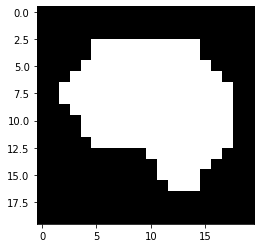

In [7]:
# Display digit 1010
plt.imshow(images[1010], cmap=plt.cm.gray_r, interpolation='nearest')


In [0]:
# Create feature and target arrays
X = data
y = target


In [0]:
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)


In [0]:
# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)


In [0]:
# Fit the classifier to the training data
classifier = knn.fit(X_train, y_train)


In [12]:
# Print the accuracy
print(knn.score(X_test, y_test))


0.9953051643192489


In [0]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))


In [0]:
# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)



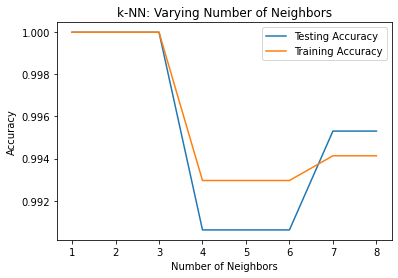

In [15]:
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


In [0]:
#99.6% SOTA

Confusion matrix, without normalization
[[14  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 41  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 10  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 10  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 13  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 13  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 14  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 11  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 10  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  9  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  8  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  9  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 50]]
Normalized confusion matrix
[[1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0. ]


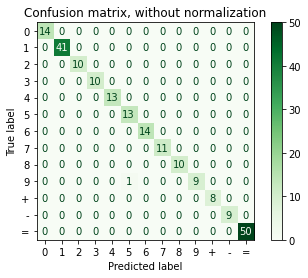

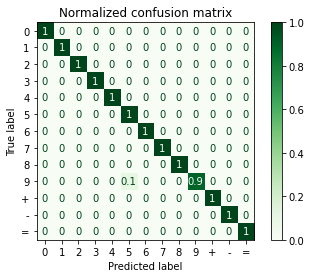

In [17]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

class_names = symbols
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Greens,
                                 normalize=normalize)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)

plt.show()
